In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
training_sample = np.array(
    [[3, 9], [1, 3], [1, 2], [3, 8],
     [5, 1], [4, 5], [6, 9], [7, 3]],
     dtype=np.float32
)
test_sample = np.array([2, 5], dtype=np.float32)

distance = training_sample - test_sample
distance = np.linalg.norm(distance, axis=-1)

print(distance)

In [5]:
training_sample = np.array(
    [-0.17, 0.24, -0.79, 0.32, 0.44, 
     0.08, 0.26, 0.06, -0.71, 0.65],
     dtype=np.float32
)

mle_mu = np.average(training_sample)

norm_pdf_estimate = stats.norm(loc=mle_mu, scale=1.0).pdf
norm_pdf_true = stats.norm(loc=0.0, scale=1.0).pdf

mse = norm_pdf_estimate(training_sample) - norm_pdf_true(training_sample)
mse = np.sum(mse ** 2) / mse.size

print(mle_mu)
print(mse)

0.037999995
2.9689482114977054e-05


In [19]:
def parzen_window_estimator(x, sample, phi, h):
    X = (x - sample) / h
    density = np.sum(phi(X)) / (sample.size * h)
    return density

estimator = lambda x: parzen_window_estimator(
    x, 
    training_sample, 
    stats.norm(loc=0.0, scale=1.0).pdf,
    1 / np.sqrt(training_sample.size)
)
paezen_pdf_estimate = np.vectorize(estimator)

mse = paezen_pdf_estimate(training_sample) - norm_pdf_true(training_sample)
mse = np.sum(mse ** 2) / mse.size

print(paezen_pdf_estimate(training_sample))
print(mse)

[0.52957389 0.80670396 0.27454097 0.78625998 0.70245876 0.75651464
 0.80450446 0.74277765 0.29310771 0.46531779]
0.09196364546661315


C:\Users\HUAWEI MateBook 14\AppData\Local\Temp\ipykernel_10852\3472560302.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


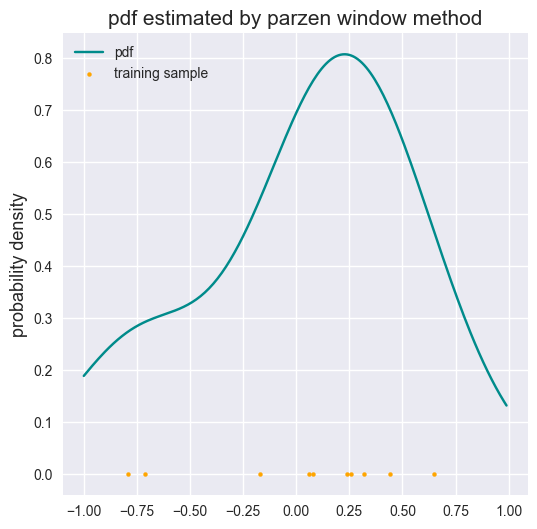

In [18]:
pdf_x = np.arange(-1.0, 1.0, 0.01)
pdf = paezen_pdf_estimate(pdf_x)

plt.style.use('seaborn')
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title('pdf estimated by parzen window method', fontsize=15)
ax.set_ylabel('probability density', fontsize=13)
ax.plot(pdf_x, pdf, color='darkcyan', label='pdf')
ax.scatter(training_sample, 
           np.zeros_like(training_sample),
           s=8, label='training sample', color='orange')
ax.legend()
plt.show()